In [11]:
import pandas as pd
from UDFs import expand_contractions, extract_words, remove_stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

In [12]:
# Load the data
dfjokes = pd.read_csv('jokes.csv')
print(dfjokes.head())

print(dfjokes.isnull().any()) # Check for missing values
print(dfjokes.dtypes) # Check the data type
print(dfjokes.shape[0]) # Check the number of observations

                                                text  humor
0  Joe biden rules out 2020 bid: 'guys, i'm not r...  False
1  Watch: darvish gave hitter whiplash with slow ...  False
2  What do you call a turtle without its shell? d...   True
3      5 reasons the 2016 election feels so personal  False
4  Pasco police shot mexican migrant from behind,...  False
text     False
humor    False
dtype: bool
text     object
humor      bool
dtype: object
200000


In [13]:
# Expand contractions
text1 = []
for element in dfjokes.text.values:
    text1.append(expand_contractions(element))

# Extract words from text
words1 = [extract_words(element) for element in text1]

# Remove 'stopwords'
text2 = []
for element in words1:
    text2.append(remove_stopwords(element))

# Concatenate words back to text
text3 = []
for i in range(0, len(text2)):
    text3.append(" ".join(text2[i]))

# Update the dataframe
dfjokes.text = text3
print(dfjokes.head())

                                                text  humor
0                        joe biden rules bid running  False
1      watch darvish gave hitter whiplash slow pitch  False
2                           call turtle without dead   True
3                    reasons election feels personal  False
4  pasco police shot mexican migrant behind new a...  False


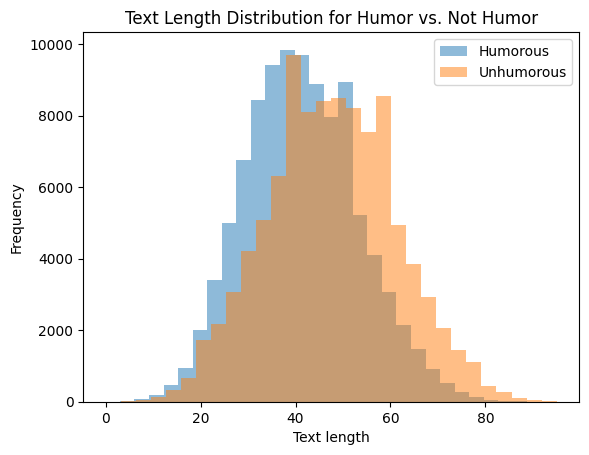

In [14]:
# Text length: humor vs. not humor
dfjokes['text_length'] = dfjokes['text'].apply(len)
plt.hist(dfjokes[dfjokes['humor'] == True]['text_length'], bins = 30, alpha = 0.5, label = 'Humorous')
plt.hist(dfjokes[dfjokes['humor'] == False]['text_length'], bins = 30, alpha = 0.5, label = 'Unhumorous')
plt.legend()
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution for Humor vs. Not Humor')
plt.show()

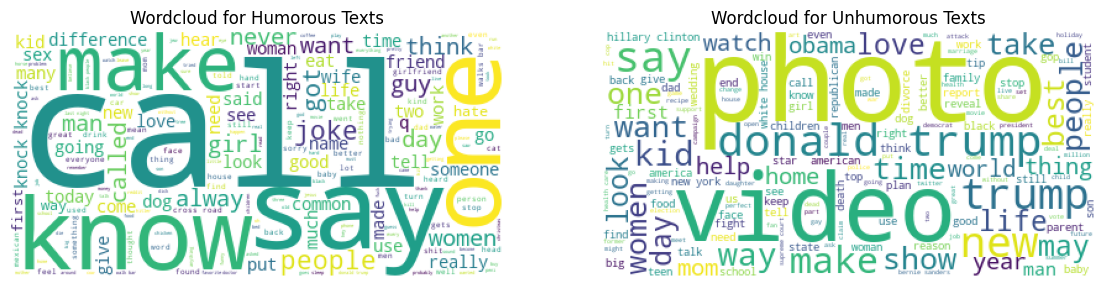

In [15]:
# Wordcloud: humor vs. not humor
plt.figure(figsize = (14, 4))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(background_color = 'white').generate(" ".join(dfjokes.text[dfjokes.humor == True])))
plt.title("Wordcloud for Humorous Texts")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(background_color = 'white').generate(" ".join(dfjokes.text[dfjokes.humor == False])))
plt.title("Wordcloud for Unhumorous Texts")
plt.axis("off")
plt.show()

In [16]:
# Is the data well-balanced?
print("Number of humorous texts:", dfjokes.humor[dfjokes.humor == True].count())
print("Number of unhumorous texts:", dfjokes.humor[dfjokes.humor == False].count())

Number of humorous texts: 100000
Number of unhumorous texts: 100000


In [17]:
# Data transformation and split into the training and test sets
dfjokes.humor.replace(True, 1, inplace = True)
dfjokes.humor.replace(False, 0, inplace = True)

X = dfjokes.text.values
y = dfjokes.humor.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print("Size of the training set:", len(X_train))
print("Size of the test set:", len(X_test))

Size of the training set: 140000
Size of the test set: 60000


In [18]:
print(X_train)

['animal wife get divorce cheetah'
 'coffee even decaf could help cut diabetes risk'
 'got let meet dentist black people' ...
 'airbnb slapped suit alleged discrimination black guests'
 'report murdoch daughter splits media couple husband'
 'wanted drive shop buy guacamole avocado']


In [19]:
# Vectorize text data
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train)

  (0, 1551)	1
  (0, 47832)	1
  (0, 17739)	1
  (0, 12454)	1
  (0, 7537)	1
  (1, 8473)	1
  (1, 14699)	1
  (1, 10970)	1
  (1, 9657)	1
  (1, 19829)	1
  (1, 10466)	1
  (1, 11786)	1
  (1, 36899)	1
  (2, 18315)	1
  (2, 24949)	1
  (2, 27164)	1
  (2, 11433)	1
  (2, 4400)	1
  (2, 32161)	1
  (3, 18026)	1
  (3, 19642)	1
  (3, 12279)	1
  (3, 13806)	1
  (3, 17607)	1
  (3, 14983)	1
  :	:
  (139996, 20644)	1
  (139996, 32982)	1
  (139996, 43507)	1
  (139996, 27990)	1
  (139996, 3862)	1
  (139997, 4400)	1
  (139997, 18814)	1
  (139997, 42223)	1
  (139997, 1089)	1
  (139997, 39934)	1
  (139997, 12184)	1
  (139997, 837)	1
  (139998, 9716)	1
  (139998, 27109)	1
  (139998, 36201)	1
  (139998, 41024)	1
  (139998, 20928)	1
  (139998, 10807)	1
  (139998, 28840)	1
  (139999, 6153)	1
  (139999, 47174)	1
  (139999, 13015)	1
  (139999, 39299)	1
  (139999, 2773)	1
  (139999, 18776)	1


In [20]:
# Logistic regression (LR) with Stochastic Gradient Descent (SGD) training
lr_classifier = SGDClassifier(loss = 'log_loss', max_iter = 1000)
lr_classifier.fit(X_train, y_train)

SGDClassifier(loss='log_loss')

In [21]:
# Multinomial Naive Bayes (MNB)
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [22]:
# LR evaluation (training set)
y_train_pred_lr = lr_classifier.predict(X_train)

f1_train_lr = f1_score(y_train, y_train_pred_lr).round(decimals = 4)
acc_train_lr = accuracy_score(y_train, y_train_pred_lr).round(decimals = 4)
prec_train_lr = precision_score(y_train, y_train_pred_lr).round(decimals = 4)
rec_train_lr = recall_score(y_train, y_train_pred_lr).round(decimals = 4)
print('LR - training set:', '\nF1:', f1_train_lr, '\nAccuracy:', acc_train_lr,
      '\nPrecision:', prec_train_lr, '\nRecall:', rec_train_lr)

# MNB evaluation (training set)
y_train_pred_mnb = mnb_classifier.predict(X_train)

f1_train_mnb = f1_score(y_train, y_train_pred_mnb).round(decimals = 4)
acc_train_mnb = accuracy_score(y_train, y_train_pred_mnb).round(decimals = 4)
prec_train_mnb = precision_score(y_train, y_train_pred_mnb).round(decimals = 4)
rec_train_mnb = recall_score(y_train, y_train_pred_mnb).round(decimals = 4)
print('\nMNB - training set:', '\nF1:', f1_train_mnb, '\nAccuracy:', acc_train_mnb,
      '\nPrecision:', prec_train_mnb, '\nRecall:', rec_train_mnb)

LR - training set: 
F1: 0.8993 
Accuracy: 0.8996 
Precision: 0.9014 
Recall: 0.8972

MNB - training set: 
F1: 0.9183 
Accuracy: 0.9172 
Precision: 0.9053 
Recall: 0.9317


In [23]:
# LR evaluation (test set)
y_test_pred_lr = lr_classifier.predict(X_test)

f1_test_lr = f1_score(y_test, y_test_pred_lr).round(decimals = 4)
acc_test_lr = accuracy_score(y_test, y_test_pred_lr).round(decimals = 4)
prec_test_lr = precision_score(y_test, y_test_pred_lr).round(decimals = 4)
rec_test_lr = recall_score(y_test, y_test_pred_lr).round(decimals = 4)
print('\nLR - test set:', '\nF1:', f1_test_lr, '\nAccuracy:', acc_test_lr,
      '\nPrecision:', prec_test_lr, '\nRecall:', rec_test_lr)

# MNB evaluation (test set)
y_test_pred_mnb = mnb_classifier.predict(X_test)

f1_test_mnb = f1_score(y_test, y_test_pred_mnb).round(decimals = 4)
acc_test_mnb = accuracy_score(y_test, y_test_pred_mnb).round(decimals = 4)
prec_test_mnb = precision_score(y_test, y_test_pred_mnb).round(decimals = 4)
rec_test_mnb = recall_score(y_test, y_test_pred_mnb).round(decimals = 4)
print('\nLR - test set:', '\nF1:', f1_test_mnb, '\nAccuracy:', acc_test_mnb,
      '\nPrecision:', prec_test_mnb, '\nRecall:', rec_test_mnb)


LR - test set: 
F1: 0.8862 
Accuracy: 0.8865 
Precision: 0.8909 
Recall: 0.8815

LR - test set: 
F1: 0.9008 
Accuracy: 0.8991 
Precision: 0.889 
Recall: 0.9129


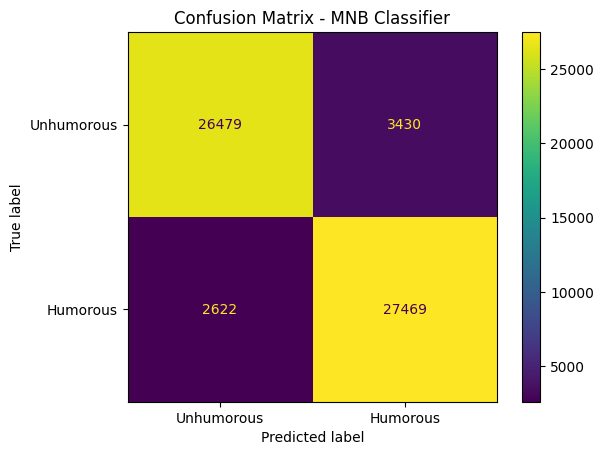

In [24]:
# MNB confusion matrix (test set)
ConfusionMatrixDisplay.from_estimator(mnb_classifier, X_test, y_test, display_labels = ["Unhumorous", "Humorous"])
plt.title("Confusion Matrix - MNB Classifier")
plt.show()

In [25]:
# Enter your text
usertext = input('Enter text:')
# Sample texts:
# (H) Why don’t Calculus majors throw house parties? Because you should never drink and derive.
# (H) A man tells his doctor, “Doc, help me. I’m addicted to Twitter!” The doctor replies, “Sorry, I don’t follow you ...”
# (H) What did the shark say when he ate the clownfish? This tastes a little funny.
# (NH) Find the latest breaking news and information on the top stories, weather, business, entertainment, politics, and more.
# (NH) Boris Johnson is still in charge. But behind closed doors, rivals are plotting his ouster.
# (NH) Seven killed in helicopter crash in Italy's Monte Cusna.

In [26]:
# Text pre-processing
usertext = " ".join(remove_stopwords(extract_words(expand_contractions(usertext))))

In [27]:
# Humor prediction using MNB classifier
user_X = vectorizer.transform([usertext])
userprediction = mnb_classifier.predict(user_X)

if userprediction[0] == 1:
    print('Your text is: humorous.')
else:
    print('Your text is: unhumorous.')

Your text is: unhumorous.


In [28]:
import streamlit as st

# Humor prediction using MNB classifier - Web App
st.title('Humor Detection App')

# Create an input box for users to enter text
user_input = st.text_input('Enter a text:')

# Text pre-processing
user_input = " ".join(remove_stopwords(extract_words(expand_contractions(user_input))))

# Vectorizing text data
user_X = vectorizer.transform([user_input])

# Humor prediction using MNB classifier
if st.button('Detect Humor'):
    user_prediction = mnb_classifier.predict(user_X)
    if user_prediction[0] == 1:
        st.write('Your text is: humorous.')
    else:
        st.write('Your text is: unhumorous.')

if __name__ == '__main__':
    st.run()

AttributeError: module 'streamlit' has no attribute 'run'